In [22]:
using Posets
using Plots
import Distributions: MvNormal

# Calculo de metodos

In [2]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end

metametodo (generic function with 1 method)

In [3]:
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [4]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)

#13 (generic function with 1 method)

# 1ra comparativa: Poset de metodo y RdP

## Datos

In [5]:
ejemplo = [generapuntuaciones_gaussian(20,7,2)[2] for _ in 1:10^3];

In [6]:
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo];

anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo];

anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [7]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true,covmat=1)[2] for _ in 1:10^3];

In [8]:
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];

anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];

anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

## Presentacion resultados

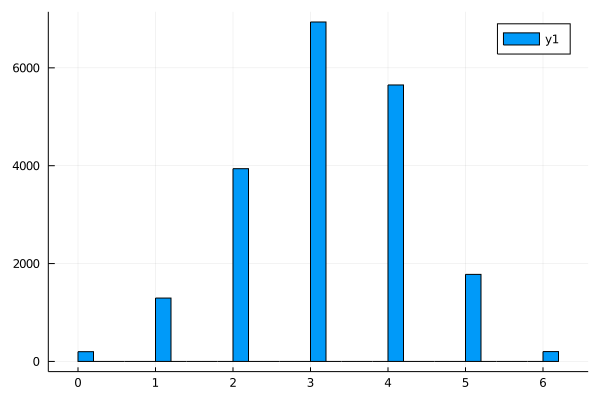

In [9]:
histogram(vcat(anima_corte0p95...))

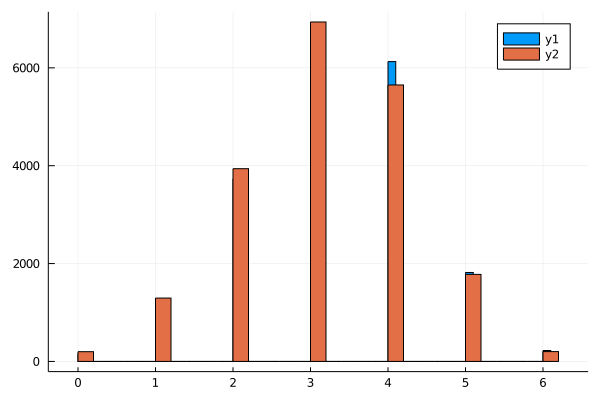

In [10]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95...)])

## Conclusiones

No hay mucha diferencia entre las diferencias, con y sin usar ruido

# 2da comparativa: PdP y Posets de metodos

## Datos

In [11]:
ejemplo = [generapuntuaciones_gaussian(20,7,2) for _ in 1:10^3];

In [12]:
anima_corte0p95 = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p90 = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo];

anima_corte0p80 = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo];

In [13]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true) for _ in 1:10^3];

In [14]:
anima_corte0p95_ruido = [metametodo_poset(corte0p95, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p90_ruido = [metametodo_poset(corte0p90, po, pu, true) for (po, pu) in ejemplo_ruido];

anima_corte0p80_ruido = [metametodo_poset(corte0p80, po, pu, true) for (po, pu) in ejemplo_ruido];

## Presentacion resultados

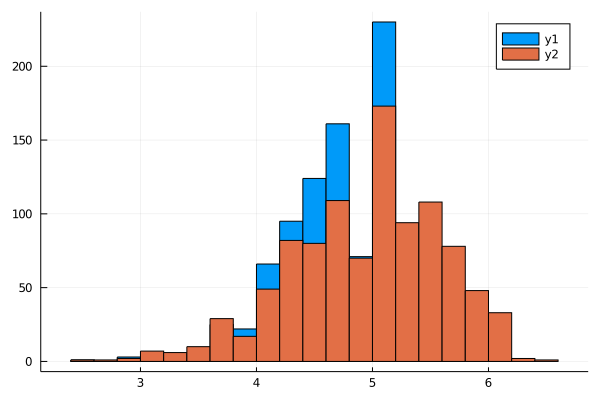

In [15]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95...)])

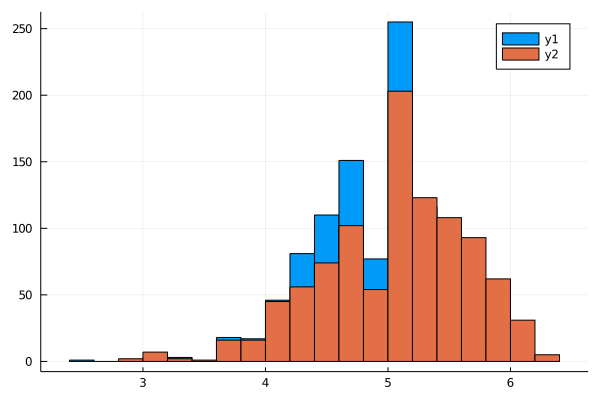

In [16]:
histogram([vcat(anima_corte0p90_ruido...), vcat(anima_corte0p90...)])

## Conclusiones

No hay mucha diferencia entre las diferencias, con y sin usar ruido

# Ruido

In [23]:
dim=2
numeronodos=10

puntosnodos = rand(MvNormal([0 for _ in 1:dim],1),numeronodos)

2×10 Array{Float64,2}:
 -0.929675  0.101444   0.175138   0.273078  …  0.948362   1.30811  -0.335324
 -0.326047  0.747783  -0.103921  -1.0582       0.387153  -1.56731  -0.543915

In [24]:
noisy = [matrizposet(puntosnodos, comparativaruidosa) for _ in 1:10^2]

100-element Array{Array{Int64,2},1}:
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 1; 0 1 … 0 0]
 [0 1 … 0 1; 1 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 1 0 … 0 0; … ; 0 1 … 0 0; 1 1 … 0 0]
 [0 0 … 1 1; 0 0 … 0 1; … ; 0 1 … 0 0; 1 0 … 0 0]
 [0 0 … 1 1; 1 0 … 0 0; … ; 1 0 … 0 0; 1 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 1 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 1 … 0 1; 1 0 … 1 0]
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 1 0 … 1 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 ⋮
 [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 1 0 … 0 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 1 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 1 0]
 [0 1 … 1 1; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 1 … 0 

In [25]:
matdis = zeros(Float64,100,100);

In [26]:
for (i,x) in enumerate(noisy), (j,y) in enumerate(noisy)
    matdis[i,j] = norm(x-y)
end

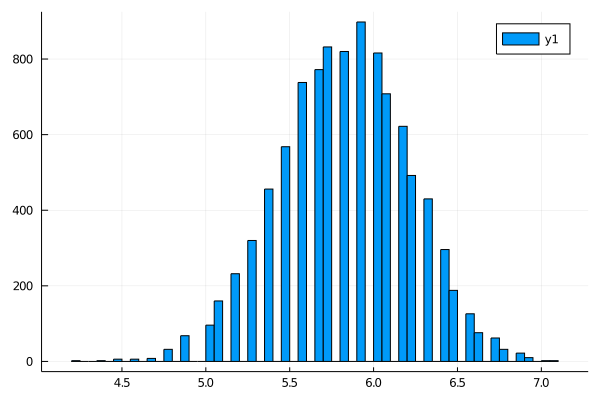

In [27]:
filter(x -> x>0, [matdis[i] for i in 1:100^2]) |> histogram